# **Prostate Cancer Model**

###By Group Number 3



## Problem Statement


To develop a machine learning model to classify patients as having prostate cancer (positive) or not (negative) based on clinical and biochemical features.



## Data Loading

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Prostate_Cancer2.csv to Prostate_Cancer2.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Prostate_Cancer2.csv']))
print(df.head())


   No.  Age        BMI   RBC  HGB   WBC     PLT   PMN  LYMPH  MONOC    tPSA  \
0    1   71  23.875115  3.37  105  5.52  195.00  3.39   1.66   0.28  13.242   
1    2   75  23.620000  4.85  137  4.25  155.00  2.72   1.01   0.33  30.570   
2    3   70  19.140000  3.58  118  1.95    1.75  0.73   0.65   0.49  20.070   
3    4   84  22.038567  4.99  158  9.10  220.00  7.85   0.84   0.28   8.798   
4    5   75  21.551020  4.66  153  4.16  251.00  2.85   1.04   0.23  10.140   

    fPSA        PV      PSAD  GLU  CRE  ALT  AST  AST/ALT Prostate Cancer  
0  2.598  72.38400  0.182941  4.4   62   26   19     0.75        negative  
1  2.240  50.21000  0.610000  4.8   52   14   16     1.14        positive  
2  7.770  50.64000  0.400000  6.0   63   22   17     0.77        positive  
3  1.183  60.88992  0.144490  5.6   58   18   21     1.17        negative  
4  1.880  56.45640  0.179608  5.9   55   17   20     1.18        negative  


## **Data preparation & Data Preprocessing**

### Data separation as X and y

In [ ]:
y = df['Prostate Cancer']
y

,Prostate Cancer
0,negative
1,positive
2,positive
3,negative
4,negative
...,...
295,positive
296,positive
297,negative
298,positive


In [ ]:
X = df.drop(['Prostate Cancer','No.'], axis=1)
X

,Age,BMI,RBC,HGB,WBC,PLT,PMN,LYMPH,MONOC,tPSA,fPSA,PV,PSAD,GLU,CRE,ALT,AST,AST/ALT
0,71,23.875115,3.37,105,5.52,195.00,3.39,1.66,0.28,13.242,2.598,72.38400,0.182941,4.4,62,26,19,0.75
1,75,23.620000,4.85,137,4.25,155.00,2.72,1.01,0.33,30.570,2.240,50.21000,0.610000,4.8,52,14,16,1.14
2,70,19.140000,3.58,118,1.95,1.75,0.73,0.65,0.49,20.070,7.770,50.64000,0.400000,6.0,63,22,17,0.77
3,84,22.038567,4.99,158,9.10,220.00,7.85,0.84,0.28,8.798,1.183,60.88992,0.144490,5.6,58,18,21,1.17
4,75,21.551020,4.66,153,4.16,251.00,2.85,1.04,0.23,10.140,1.880,56.45640,0.179608,5.9,55,17,20,1.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,75,22.460034,2.41,62,3.01,295.00,1.80,0.85,0.30,154.000,19.300,88.67000,1.736777,3.9,60,13,13,1.00
296,66,25.711008,4.89,152,7.30,220.00,3.55,2.78,0.34,11.780,2.340,111.42100,0.105725,5.0,61,17,20,1.18
297,53,21.610000,4.68,133,4.68,213.00,2.81,1.48,0.22,17.020,2.770,27.04000,0.630000,4.8,64,18,23,1.28
298,86,19.267171,4.58,143,3.06,128.00,2.05,0.73,0.12,90.195,13.208,39.71100,2.271285,5.0,77,25,23,0.92


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score, precision_score, recall_score

## Model Development

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# K-Nearest Neighbors (KNN) Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Evaluate Performance
knn_acc = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_acc)


KNN Accuracy: 0.725


In [ ]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

# Evaluate Performance
log_reg_acc = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_acc)


Logistic Regression Accuracy: 0.7166666666666667


In [ ]:
# Gradient Boosting Model
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)

# Evaluate Performance
gbc_acc = accuracy_score(y_test, gbc_pred)
print("Gradient Boosting Accuracy:", gbc_acc)


Gradient Boosting Accuracy: 0.7583333333333333


In [ ]:


from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Evaluate Performance
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)


Random Forest Accuracy: 0.7083333333333334


In [ ]:
# Stacking Classifier Model
estimators = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]
stacking = StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier())
stacking.fit(X_train, y_train)
stacking_pred = stacking.predict(X_test)

# Evaluate Performance
stacking_acc = accuracy_score(y_test, stacking_pred)
print("Stacking Accuracy:", stacking_acc)


Stacking Accuracy: 0.5916666666666667


### XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create an XGBoost classifier
model = xgb.XGBClassifier()

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the target variable to numerical values
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.7666666666666667


In [ ]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('knn', knn),
    ('lr', log_reg),
    ('gbc', gbc),
    ('rf', rf),
    ('bagging', bagging),
    ('stacking', stacking),
    ('xgb', model)], voting='soft')

voting_clf.fit(X_train, y_train)


voting_pred = voting_clf.predict(X_test)

voting_acc = accuracy_score(y_test, voting_pred)
print("Soft Voting Accuracy:", voting_acc)

voting_roc_auc = roc_auc_score(y_test, voting_clf.predict_proba(X_test)[:, 1])
voting_avg_precision = average_precision_score(y_test, voting_clf.predict_proba(X_test)[:, 1])
voting_precision = precision_score(y_test, voting_pred)
voting_recall = recall_score(y_test, voting_pred)

print("Soft Voting ROC AUC:", voting_roc_auc)
print("Soft Voting Average Precision:", voting_avg_precision)
print("Soft Voting Precision:", voting_precision)
print("Soft Voting Recall:", voting_recall)


Soft Voting Accuracy: 0.7416666666666667
Soft Voting ROC AUC: 0.7850678733031675
Soft Voting Average Precision: 0.8122808984835614
Soft Voting Precision: 0.8888888888888888
Soft Voting Recall: 0.46153846153846156


In [ ]:
from sklearn.metrics import average_precision_score
voting_aupr = average_precision_score(y_test, voting_clf.predict_proba(X_test)[:, 1])
print("Soft Voting AUPR:", voting_aupr)


Soft Voting AUPR: 0.8122808984835614


## Model Evaluation

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score, precision_score, recall_score, confusion_matrix

def evaluate_model(y_true, y_pred, model_name):

    if isinstance(y_true[0], str):
        y_true = le.transform(y_true)
    if isinstance(y_pred[0], str):
        y_pred = le.transform(y_pred)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)  # Now using numerical labels
    recall = recall_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    aupr = average_precision_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"ROC AUC: {roc_auc}")
    print(f"AUPR: {aupr}")
    print(f"True Positives: {tp}")
    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print("---")

knn_pred_encoded = le.transform(knn_pred)
evaluate_model(y_test, knn_pred_encoded, "KNN")
evaluate_model(y_test, le.transform(log_reg_pred), "Logistic Regression") # Evaluate Logistic Regression
evaluate_model(y_test, gbc_pred, "Gradient Boosting")  # Evaluate Gradient Boosting
evaluate_model(y_test, bagging_pred, "Bagging")  # Evaluate Bagging
evaluate_model(y_test, stacking_pred, "Stacking")  # Evaluate Stacking
evaluate_model(y_test, y_pred, "XGBoost")  # Evaluate XGBoost
evaluate_model(y_test, rf_pred, "Random Forest")  # Evaluate Random Forest


--- KNN ---
Accuracy: 0.7666666666666667
Precision: 0.7058823529411765
Recall: 0.5714285714285714
ROC AUC: 0.7216117216117216
AUPR: 0.5533613445378152
True Positives: 12
True Negatives: 34
False Positives: 5
False Negatives: 9
---
--- Logistic Regression ---
Accuracy: 0.8
Precision: 0.9090909090909091
Recall: 0.47619047619047616
ROC AUC: 0.7252747252747253
AUPR: 0.6162337662337661
True Positives: 10
True Negatives: 38
False Positives: 1
False Negatives: 11
---
--- Gradient Boosting ---
Accuracy: 0.7833333333333333
Precision: 0.75
Recall: 0.5714285714285714
ROC AUC: 0.7344322344322345
AUPR: 0.5785714285714285
True Positives: 12
True Negatives: 35
False Positives: 4
False Negatives: 9
---
--- Bagging ---
Accuracy: 0.7833333333333333
Precision: 0.8333333333333334
Recall: 0.47619047619047616
ROC AUC: 0.7124542124542125
AUPR: 0.5801587301587301
True Positives: 10
True Negatives: 37
False Positives: 2
False Negatives: 11
---
--- Stacking ---
Accuracy: 0.7
Precision: 0.5714285714285714
Recall

### Confusion Matrix

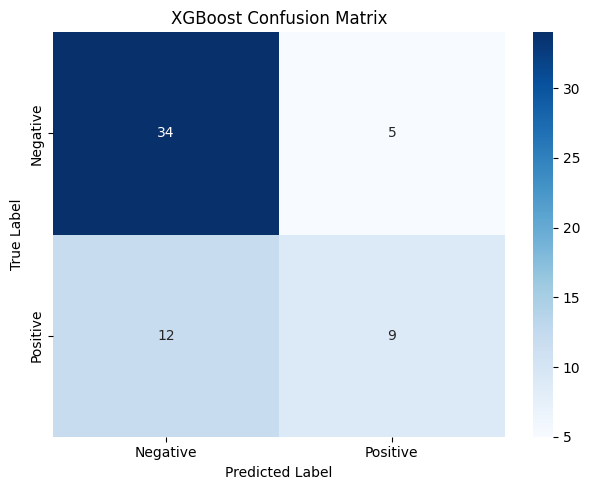

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


plt.tight_layout()
plt.show()


### ROC Curve

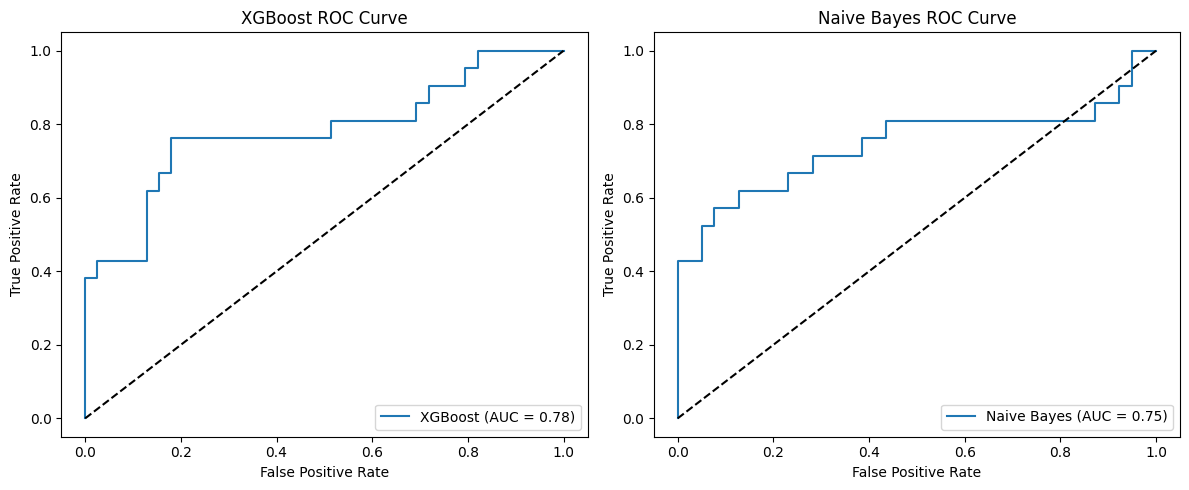

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB # Import GaussianNB

# Predict probabilities for XGBoost
y_pred_proba_xgb = model.predict_proba(X_test)[:, 1]

# Initialize and train Naive Bayes model
nb_model = GaussianNB() # Initialize GaussianNB
nb_model.fit(X_train, y_train) # Train the model

# Predict probabilities for Naive Bayes
y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Calculate ROC curve and AUC for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()
print('\n\n\n\n\n\n\n')

## Custom Value Predictor

In [ ]:
def predict_cancer(model, scaler, df):
  input_data = []
  feature_names = df.drop(['Prostate Cancer','No.'], axis=1).columns
  for feature_name in feature_names:
    while True:
      try:
        value = float(input(f"Enter value for {feature_name}: "))
        input_data.append(value)
        break
      except ValueError:
        print("Invalid input. Please enter a number.")

  input_data_scaled = scaler.transform([input_data])
  prediction = model.predict(input_data_scaled)[0]
  if prediction == 1:
    return "Positive"
  else:
    return "Negative"

prediction_result = predict_cancer(model, scaler, df)

print("Prediction:", prediction_result)

KeyboardInterrupt: Interrupted by user